<a href="https://colab.research.google.com/github/thalesdaviddom/IC-Lorena-Chico/blob/main/Citation_network_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse código foi usado para a produçao de uma rede de citaçoes composta pelos artigos obtidos na platforma scopus usando os dados do OpenAlex. Primeiro baixamos as bibliotecas necessárias e importamos o google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pandas networkx matplotlib pyalex


Agora importamos da nossa pasta no google drive o arquivo csv contendo todos os artigos que iremos usar em nossa rede de citações:

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Material_IC/Corpus/Artigos/dataset de trabalho/dataset.csv')


Esse código produz uma rede de citações em que cada node é identificado com o seu id na plataforam OpenAlex (demora cerca de 2 horas para rodar):

In [ ]:
from pyalex import Works
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

for doi in df['DOI'].dropna():
    try:
        # Fetch work details from OpenAlex
        work = Works()[f"https://doi.org/{doi}"]

        # Get the OpenAlex ID of the work
        work_id = work['id']

        # Add the work as a node
        G.add_node(work_id, label=work['display_name'])

        # Fetch works cited by this work
        for ref in work.get('referenced_works', []):
            G.add_node(ref)
            G.add_edge(work_id, ref)

        # Fetch works that cite this work
        citing_works = Works().filter(cites=work_id).get()
        for citing_work in citing_works:
            citing_work_id = citing_work['id']
            G.add_node(citing_work_id, label=citing_work['display_name'])
            G.add_edge(citing_work_id, work_id)

    except Exception as e:
        print(f"Error processing DOI {doi}: {e}")


Error processing DOI 10.35956/v.24.n2.2024.p.99-115: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.99-115
Error processing DOI 10.35956/v.24.n2.2024.p.137-159: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.137-159
Error processing DOI 10.35956/v.24.n2.2024.p.4-26: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.4-26
Error processing DOI 10.35956/v.23.n1.2022.p.52-70: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.23.n1.2022.p.52-70
Error processing DOI 10.35956/v.23.n2.2023.p.68-89: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.23.n2.2023.p.68-89
Error processing DOI 10.35956/v.22.n2.2022.p.103-131: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.22.n2.2022.p.103-

Alguns dos artigos não estavam presentes na plataforma OpenAlex e, por isso, seus nodes ficaram com valor "None", vamos corrigir esse problema transformando esses nodes e edges em "N/A":

In [ ]:
for node, attrs in G.nodes(data=True):
    for key, value in attrs.items():
        if value is None:
            G.nodes[node][key] = "N/A"

for source, target, attrs in G.edges(data=True):
    for key, value in attrs.items():
        if value is None:
            G.edges[source, target][key] = "N/A"

Após corrigir o problema podemos salvar nosso network como graphml:

In [ ]:
nx.write_graphml(G, "/content/drive/MyDrive/Material_IC/Corpus/Artigos/networks/citation_network.graphml")


Precisamos saber todos os artigos que não estavam na base de dados da OpenAlex, por isso vamos usar as mensagens de erro do programa para gravar todos os dois que não estavam na base de dados:

In [ ]:
import re
import pandas as pd

# Define the error message text (replace this with the actual log content if reading from a file)
error_message = """
Error processing DOI 10.35956/v.24.n2.2024.p.99-115: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.99-115
Error processing DOI 10.35956/v.24.n2.2024.p.137-159: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.137-159
Error processing DOI 10.35956/v.24.n2.2024.p.4-26: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.4-26
Error processing DOI 10.35956/v.23.n1.2022.p.52-70: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.23.n1.2022.p.52-70
Error processing DOI 10.35956/v.23.n2.2023.p.68-89: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.23.n2.2023.p.68-89
Error processing DOI 10.35956/v.22.n2.2022.p.103-131: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.22.n2.2022.p.103-131
Error processing DOI 10.35956/v.22.n2.2022.p.222-237: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.22.n2.2022.p.222-237
Error processing DOI 10.35956/v.22.n2.2022.p.81-102: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.22.n2.2022.p.81-102
Error processing DOI 10.35956/v.21.n1.2021.p.23-43: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.21.n1.2021.p.23-43
Error processing DOI 10.1017/S002.2.2.16X1700116X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1017/S002.2.2.16X1700116X
Error processing DOI 10.1017/S002.2.2.16X17001146: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1017/S002.2.2.16X17001146
Error processing DOI 10.14201/alh2017776792: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.14201/alh2017776792
Error processing DOI 10.14201/alh201776115137: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.14201/alh201776115137
Error processing DOI 10.14201/alh2017767592: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.14201/alh2017767592
Error processing DOI 10.14201/alh2017765573: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.14201/alh2017765573
Error processing DOI 10.60583/gypp.v33i1.8188: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.60583/gypp.v33i1.8188
Error processing DOI 10.60583/gypp.v33i2.8270: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.60583/gypp.v33i2.8270
Error processing DOI 10.1590/dados.2024.67.1.313: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/dados.2024.67.1.313
Error processing DOI 10.60583/gypp.v32i2.8122: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.60583/gypp.v32i2.8122
Error processing DOI 10.1590/0102-019026/116: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/0102-019026/116
Error processing DOI 10.22517/25392662.2352: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.22517/25392662.2352
Error processing DOI 10.5281/zenodo.3872487: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3872487
Error processing DOI 10.5281/zenodo.3872581: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3872581
Error processing DOI 10.5281/zenodo.3740100: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3740100
Error processing DOI 10.5281/zenodo.3872528: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3872528
Error processing DOI 10.5281/zenodo.4110898: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4110898
Error processing DOI 10.5281/zenodo.3984199: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3984199
Error processing DOI 10.5281/zenodo.3987649: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3987649
Error processing DOI 10.5281/zenodo.4003326: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4003326
Error processing DOI 10.5281/zenodo.4280118: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4280118
Error processing DOI 10.5281/zenodo.4003344: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4003344
Error processing DOI 10.5281/zenodo.4003110: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4003110
Error processing DOI 10.5281/zenodo.3931048: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3931048
Error processing DOI 10.5281/zenodo.4087614: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4087614
Error processing DOI 10.5281/zenodo.3987618: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3987618
Error processing DOI 10.5281/zenodo.3931056: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3931056
Error processing DOI 10.5281/zenodo.4003216: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4003216
Error processing DOI 10.5281/zenodo.4280192: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4280192
Error processing DOI 10.5281/zenodo.3931044: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3931044
Error processing DOI 10.5281/zenodo.3907034: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3907034
Error processing DOI 10.5281/zenodo.4280080: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4280080
Error processing DOI 10.5281/zenodo.3987634: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3987634
Error processing DOI 10.5281/zenodo.4110912: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4110912
Error processing DOI 10.5281/zenodo.4110937: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4110937
Error processing DOI 10.5281/zenodo.4009710: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.4009710
Error processing DOI 10.5281/zenodo.3815272: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3815272
Error processing DOI 10.5281/zenodo.3808663: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3808663
Error processing DOI 10.5281/zenodo.3338572: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3338572
Error processing DOI 10.5281/zenodo.3344846: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3344846
Error processing DOI 10.5281/zenodo.3110686: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3110686
Error processing DOI 10.5281/zenodo.2653159: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.2653159
Error processing DOI 10.5281/zenodo.3338590: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3338590
Error processing DOI 10.5281/zenodo.3344925: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3344925
Error processing DOI 10.5281/zenodo.3344932: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3344932
Error processing DOI 10.5281/zenodo.3338594: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3338594
Error processing DOI 10.5281/zenodo.3463779: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3463779
Error processing DOI 10.5281/zenodo.3344856: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3344856
Error processing DOI 10.5281/zenodo.3110438: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.3110438
Error processing DOI 10.5281/zenodo.1439069: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.1439069
Error processing DOI 10.21308/recp.47.00: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.21308/recp.47.00
Error processing DOI 10.5281/zenodo.1438572: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.1438572
Error processing DOI 10.1590/0102-149180/10: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/0102-149180/10
Error processing DOI 10.5281/zenodo.1510026: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.1510026
Error processing DOI 10.5281/zenodo.1495816: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.1495816
Error processing DOI 10.5281/zenodo.1772470: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5281/zenodo.1772470
Error processing DOI 10.1590/0102-011038/103: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/0102-011038/103
Error processing DOI 10.1590/0102-039068/103: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/0102-039068/103
Error processing DOI 10.1590/0102-167202/103: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/0102-167202/103
Error processing DOI 10.1590/0102-069101/103: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/0102-069101/103
Error processing DOI 10.5380/RSOCP.V24I58.47219: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.5380/RSOCP.V24I58.47219
Error processing DOI 10.1590/S0104-62762013000100001.: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.1590/S0104-62762013000100001.

"""

# Extract DOIs from the text using regex
dois = re.findall(r'Error processing DOI ([\w./-]+): 404 Client Error', error_message)

# Create a DataFrame
df_not_found = pd.DataFrame(dois, columns=["DOI"])

# Save as CSV
csv_path = "/content/drive/MyDrive/Material_IC/Corpus/Artigos/dataset de trabalho/doi_not_found_open_alex.csv"
df_not_found.to_csv(csv_path, index=False)

print(f"CSV file saved successfully: {csv_path}")


CSV file saved successfully: /content/drive/MyDrive/Material_IC/Corpus/Artigos/doi_not_found_open_alex.csv


Por último, vale enfatizar que o grafo criado tem como nodes os ids dos artigos para o OpenAlex, além disso não colocamos nenhuma restrição sobre os tipos de trabalho que podem entrar como nodes, o que significa que vários nodes dessa network podem não ser artigos científicos, mas sim livros. Vamos tentar filtrar nosso grafo para que ele tenha apenas os nodes relativos aos artigos de nosso dataset original:

In [ ]:
import networkx as nx

graphml_file = "/content/drive/MyDrive/Material_IC/Corpus/Artigos/networks/citation_network.graphml"  # Replace with your file path
G = nx.read_graphml(graphml_file)

In [ ]:
import pandas as pd
from pyalex import Works

def get_openalex_id_from_csv(csv_file: str) -> pd.DataFrame:
    """
    Loads a CSV file and retrieves OpenAlex IDs for DOIs in the dataset.

    Parameters:
    - csv_file (str): Path to the CSV file.
    - doi_column (str): Name of the column containing DOIs.

    Returns:
    - pd.DataFrame: A DataFrame with DOIs and corresponding OpenAlex IDs.
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Function to get OpenAlex ID for a single DOI
    def fetch_openalex_id(doi):
        if pd.isna(doi):
            return None  # Skip missing DOIs
        try:
            work = Works()[f"https://doi.org/{doi}"]  # Fetch work using DOI
            return work.get('id', None)  # Extract OpenAlex ID
        except Exception as e:
            print(f"Error fetching OpenAlex ID for DOI {doi}: {e}")
            return None

    # Apply function to all DOIs in the column
    df["OpenAlex_ID"] = df["DOI"].apply(fetch_openalex_id)

    return df  # Return the updated DataFrame

df = get_openalex_id_from_csv("/content/drive/MyDrive/Material_IC/Corpus/Artigos/data.csv")
df.to_csv("/content/drive/MyDrive/Material_IC/Corpus/Artigos/data_id_doi.csv")

Error fetching OpenAlex ID for DOI 10.35956/v.24.n2.2024.p.99-115: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.99-115
Error fetching OpenAlex ID for DOI 10.35956/v.24.n2.2024.p.137-159: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.137-159
Error fetching OpenAlex ID for DOI 10.35956/v.24.n2.2024.p.4-26: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.24.n2.2024.p.4-26
Error fetching OpenAlex ID for DOI 10.35956/v.23.n1.2022.p.52-70: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.23.n1.2022.p.52-70
Error fetching OpenAlex ID for DOI 10.35956/v.23.n2.2023.p.68-89: 404 Client Error: NOT FOUND for url: https://api.openalex.org/works/https://doi.org/10.35956/v.23.n2.2023.p.68-89
Error fetching OpenAlex ID for DOI 10.35956/v.22.n2.2022.p.103-131: 404 Client Error: NOT FOUND 

In [ ]:
# Drop rows where either DOI or OpenAlex ID is missing
df_cleaned = df.dropna()

# Convert to dictionary
doi_openalex_dict = dict(zip(df_cleaned["DOI"], df_cleaned["OpenAlex_ID"]))

In [ ]:
nodelist = []
for doi in df_cleaned["DOI"]:
  nodelist += [doi_openalex_dict[doi]]

In [ ]:
SubG = G.subgraph(nodelist)

nx.write_graphml(SubG, "/content/drive/MyDrive/Material_IC/Corpus/Artigos/citation_subnetwork.graphml")


Por fim, vejamos a distribuiçao de grau dos vertices:

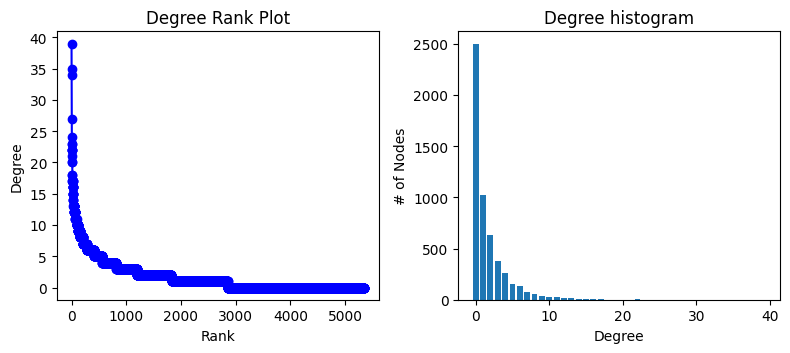

In [ ]:
degree_sequence = sorted((d for n, d in SubG.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

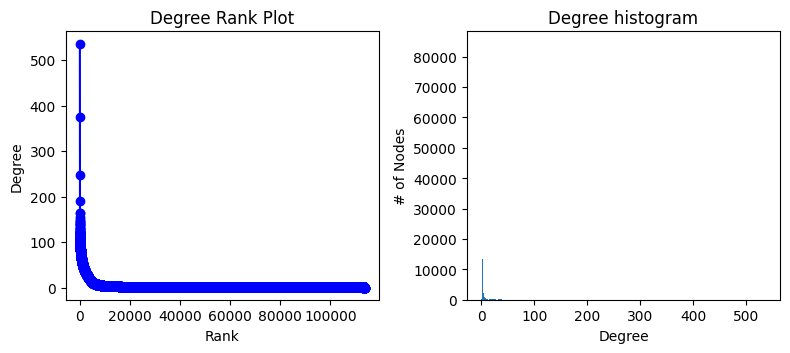

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()